In [ ]:
!pip install tensorflow==1.14
!pip install stable-baselines
!pip install gym_anytrading

     |████████████████████████████████| 109.3 MB 52 kB/s 
     |████████████████████████████████| 488 kB 59.5 MB/s 
     |████████████████████████████████| 3.1 MB 53.8 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you

     |████████████████████████████████| 240 kB 14.9 MB/s 
     |████████████████████████████████| 171 kB 14.1 MB/s 


In [ ]:
import gym 
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
env.signal_features

NameError: ignored

In [ ]:
df = pd.read_csv('/content/S&P.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', ascending=True, inplace=True)
df.set_index('Date', inplace=True)

df['Open'] = df['Open'].apply(lambda x: float(x.replace(',', '')))
df['High'] = df['High'].apply(lambda x: float(x.replace(',', '')))
df['Close'] = df['Close'].apply(lambda x: float(x.replace(',', '')))
df['Low'] = df['Low'].apply(lambda x: float(x.replace(',', '')))
env = gym.make('stocks-v0', df = df, frame_bound=(5,200), window_size=5)
env.action_space

Discrete(2)

{'total_reward': 377.95000000000255, 'total_profit': 0.5400299830041052, 'position': 1}


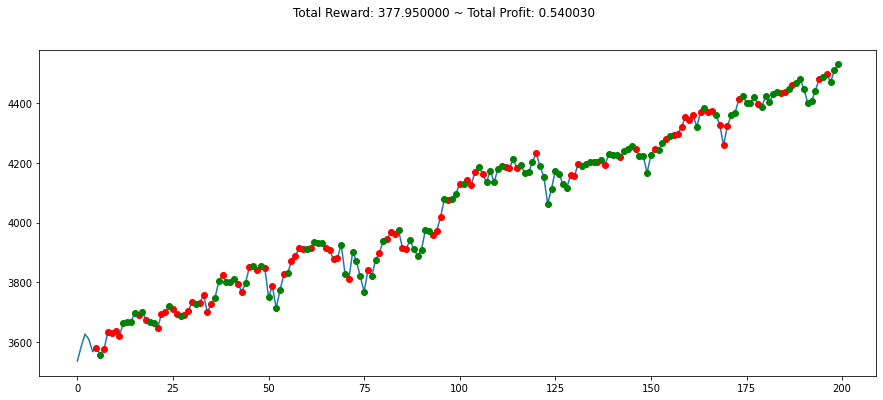

In [ ]:
state = env.reset()

while True:
  action = env.action_space.sample()
  next_state, reward, done, info = env.step(action)

  if done:
    print(info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_training = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [ ]:
env = DummyVecEnv([env_training])

In [ ]:
#Create our model

model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

---------------------------------
| explained_variance | -0.00446 |
| fps                | 22       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 160      |
---------------------------------
----------------------------------
| explained_variance | -0.000255 |
| fps                | 488       |
| nupdates           | 100       |
| policy_entropy     | 0.693     |
| total_timesteps    | 500       |
| value_loss         | 2.52      |
----------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 552       |
| nupdates           | 200       |
| policy_entropy     | 0.692     |
| total_timesteps    | 1000      |
| value_loss         | 5

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(200, 253), window_size=5)
obs = env.reset()

while True:
  obs = obs[np.newaxis, ...]
  action, state = model.predict(obs)
  obs, rewards, done, info = env.step(action)

  if done:
    print(info)
    break

{'total_reward': 214.25000000000182, 'total_profit': 0.9296790130120914, 'position': 0}


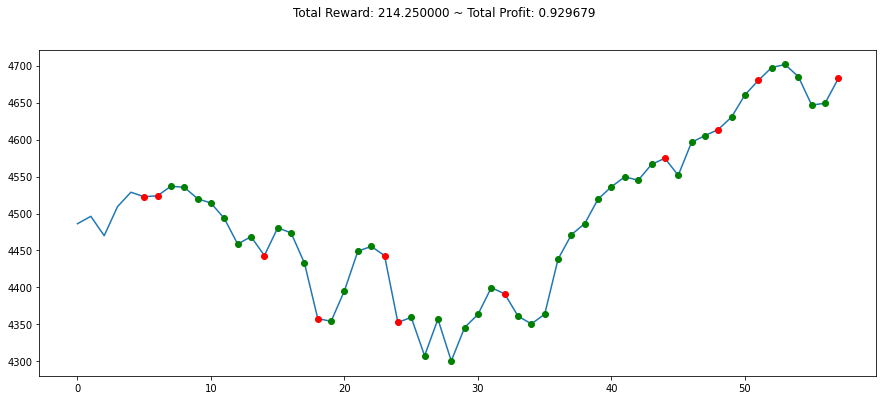

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
#Add TA to Data
!pip install yfinance

In [ ]:
!pip install ta

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
df

,Open,High,Low,Close
Date,,,,
2020-11-12,3562.67,3569.02,3518.58,3537.01
2020-11-13,3552.57,3593.66,3552.57,3585.15
2020-11-16,3600.16,3628.51,3600.16,3626.91
2020-11-17,3610.31,3623.11,3588.68,3609.53
2020-11-18,3612.09,3619.09,3567.33,3567.79
...,...,...,...,...
2021-11-08,4701.48,4714.92,4694.39,4701.70
2021-11-09,4707.25,4708.53,4670.87,4685.25
2021-11-10,4670.26,4684.85,4630.86,4646.71


In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override()
data = pdr.get_data_yahoo('SPY', start = '2017-01-01', end='2021-01-01',headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

[*********************100%***********************]  1 of 1 completed


In [ ]:
from ta import  add_all_ta_features
df2 = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=True)

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df2

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,206.871765,91366500,3.607831e+07,91366500,0.394875,0.000000e+00,50.000000,0.000000,0.000000,-1.873104e+07,1000.000000,224.983337,0.000000,225.240005,225.240005,225.240005,0.000000,0.000000,0.0,0.0,224.983337,226.933334,223.033340,1.733459,0.565812,0.0,0.0,223.880005,225.830002,224.855003,0.865742,0.697437,0.000000,0.000000,0.000000,0.000000,225.240005,225.240005,225.240005,225.240005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.545920,1.000000,0.000000,57.656419,-203.807522,-203.807522,0.000000,224.855003,224.855003,224.855003,224.855003,280.653086,276.988436,4.0,4.0,0.0,-1.000000,-1.000000,0.0,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.743730,69.743730,-30.256270,0.000000,225.240005,0.000000,0.000000,0.000000,0.000000,-20.380752,0.000000,0.000000
2017-01-04,225.619995,226.750000,225.610001,226.580002,208.102524,78744400,9.133778e+07,170110900,0.536931,1.055172e+08,100.000000,1.918226,1.918226,-1.815271e+07,1005.949193,225.598993,0.000000,225.910004,227.250000,224.570007,1.186310,0.750000,0.0,0.0,225.648336,227.193334,224.103338,1.369386,0.801510,0.0,0.0,223.880005,226.750000,225.315002,1.270415,0.940767,0.000000,0.106894,0.021379,0.085515,225.910004,225.910004,225.446159,225.339264,0.000000,0.000000,0.000000,0.047417,0.003635,0.043782,0.001162,1.932416,66.666667,56.986421,-201.439171,-202.623347,1.184176,225.315002,225.315002,225.315002,225.315002,280.653086,276.988436,8.0,4.0,4.0,-1.000000,-1.000000,0.0,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,38.728314,94.076709,81.910219,-5.923291,0.000000,225.783797,0.000000,-1.113429,-0.222686,-0.890743,0.594919,0.593157,0.594919
2017-01-05,226.270004,226.580002,225.479996,226.399994,207.937149,78379000,1.440645e+08,91731900,0.579760,8.842777e+07,50.133959,-0.210519,0.853854,4.061970e+05,1005.150011,225.773843,0.000000,226.073334,227.260967,224.885700,1.050662,0.637526,0.0,0.0,225.816667,227.213335,224.420000,1.236992,0.708828,0.0,0.0,223.880005,226.750000,225.315002,1.269497,0.878046,0.000000,0.175066,0.052116,0.122949,226.073334,226.073334,225.592903,225.417837,0.000000,0.000000,0.000000,0.062311,0.024178,0.038133,0.002894,2.817748,40.399741,56.823091,-200.861821,-202.036171,1.174350,225.315002,225.315002,225.315002,225.315002,280.653086,276.988436,8.0,4.0,4.0,-1.000000,225.830002,0.0,1.0,0.000000,87.361569,0.000000,0.000000,0.000000,99.701923,49.561310,87.804645,83.875028,-12.195355,0.000000,226.029749,0.000000,-2.025313,-0.583211,-1.442102,-0.079446,-0.079477,0.515001
2017-01-06,226.529999,227.750000,225.89999

In [ ]:
from gym_anytrading.envs import StocksEnv

def my_processed_data(env):
  start = env.frame_bound[0] - env.window_size
  end = env.frame_bound[1]
  prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
  signal_features = env.df.loc[:, ['Close', 'Volume', 'momentum_rsi', 'volume_obv', 'trend_macd_diff']].to_numpy()[start:end]
  return prices, signal_features

class MyCustomEnv(StocksEnv):
  _process_data = my_processed_data

In [ ]:
env2 = MyCustomEnv(df=df2, window_size=5, frame_bound=(5,700))

In [ ]:
env2.signal_features

array([[ 2.25240005e+02,  9.13665000e+07,  1.00000000e+02,
         9.13665000e+07,  0.00000000e+00],
       [ 2.26580002e+02,  7.87444000e+07,  1.00000000e+02,
         1.70110900e+08,  8.55154358e-02],
       [ 2.26399994e+02,  7.83790000e+07,  8.73615694e+01,
         9.17319000e+07,  1.22949401e-01],
       ...,
       [ 2.93239990e+02,  5.52963000e+07,  4.81878352e+01,
         1.63338480e+09, -6.39538604e-01],
       [ 2.96279999e+02,  9.87204000e+07,  5.30751192e+01,
         1.73210520e+09, -2.46991828e-01],
       [ 2.95950012e+02,  4.03948000e+07,  5.24962634e+01,
         1.69171040e+09, -4.20828432e-03]])

In [ ]:
training_env = lambda: env2
env = DummyVecEnv([training_env])

In [ ]:
model = A2C("MlpLstmPolicy", env, verbose=1)
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | 0.0332   |
| fps                | 23       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.71     |
---------------------------------
---------------------------------
| explained_variance | 0.0172   |
| fps                | 480      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 14.2     |
---------------------------------
---------------------------------
| explained_variance | 0.0126   |
| fps                | 543      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 5.49     |
---------------------------------
---------------------------------
| explained_variance | -0.0018  |
| fps                | 565      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

In [ ]:
env = MyCustomEnv(df=df2, window_size=5, frame_bound=(700, 1000))
obs = env.reset()

while True:
  obs = obs[np.newaxis, ...]
  action, state = model.predict(obs)
  obs, rewards, done, info = env.step(action)

  if done:
    print(info)
    break

{'total_reward': 35.86004638671875, 'total_profit': 0.40902880624918025, 'position': 1}


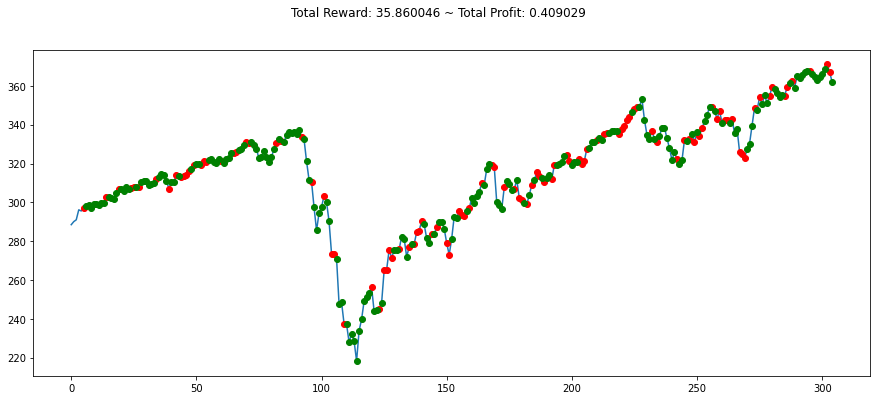

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()